In [25]:
import json
import numpy as np
def save_json(data, filepath=r'new_data.json'):
    with open(filepath, 'w', encoding='utf-8') as fp:
        json.dump(data, fp, indent=4)
def min_max_normalize(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    
    return normalized_data


In [51]:
from sklearn.manifold import MDS, SpectralEmbedding, TSNE, LocallyLinearEmbedding
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import math
def dr(X, method="MDS"):
    if method == "MDS":
        embedding = MDS(n_components=2)
    elif method == "spectral":
        embedding = SpectralEmbedding(n_components=2)
    elif method == "tsne":
        embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=min(70, max(5, (X.shape[0]-1)//5)))
        print(embedding.perplexity)
    elif method == "locallylinear":
        embedding = LocallyLinearEmbedding(n_components=2)
    elif method == "pca":
        embedding = PCA(n_components=2)
    elif method == "kernelpca":
        embedding = KernelPCA(n_components=2, kernel='sigmoid')
    X_transformed = embedding.fit_transform(X)
    return X_transformed

def plot(XY):
    plt.figure(figsize=(8, 6))
    plt.scatter(XY[:, 0], XY[:, 1])
    plt.title('Scatterplot')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

In [ ]:
messages = [
    {
        "role": "system",
        "content": """Instructions...
        Reply with the following JSON format:
        {
            "title": (string) xxx,
            "perspective": (list) [xxx, xxx, xxx],
            "suggestions": (list) [xxx, xxx, xxx],
        }
"""
    }
]

In [37]:
import glob
from collections import defaultdict
def organize_chunk_topis():
    interview_files = glob.glob('../data/result/chunk_summaries/*.json')
    topic_chunks_dict = defaultdict(list)
    for interview_file in interview_files:
        chunks = json.load(open(interview_file, 'r'))
        for chunk in chunks:
            topic_chunks_dict[chunk['topic']].append(chunk['id'])
    return topic_chunks_dict

能源
(29, 1536)
5


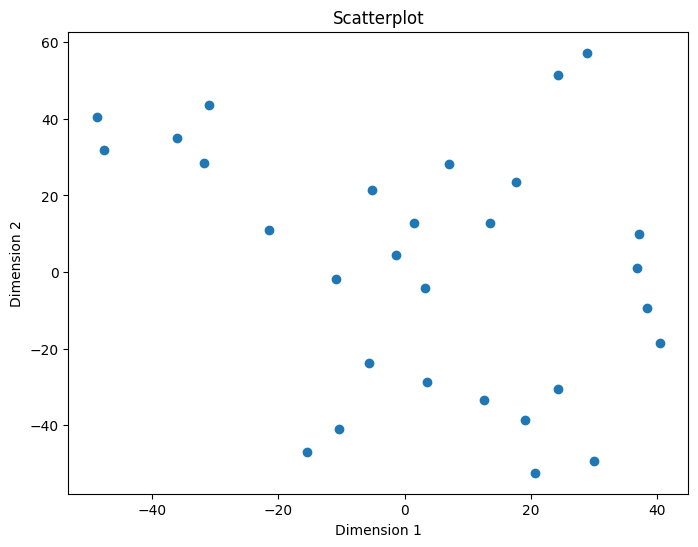

住屋
(32, 1536)
6


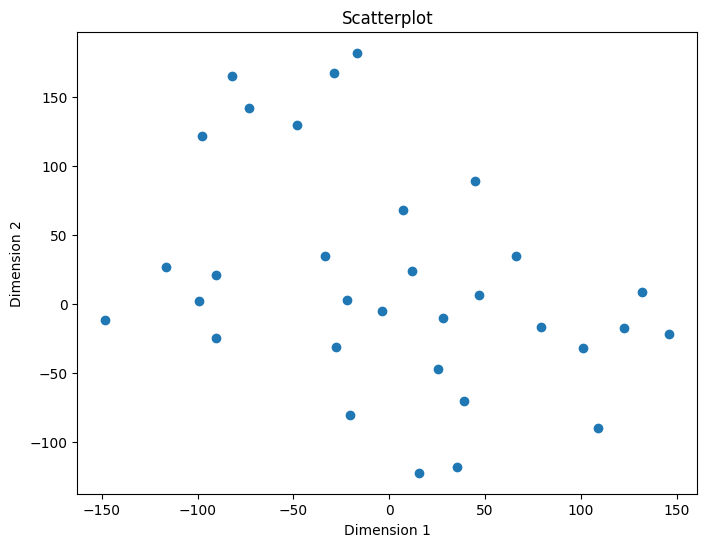

交通
(65, 1536)
12


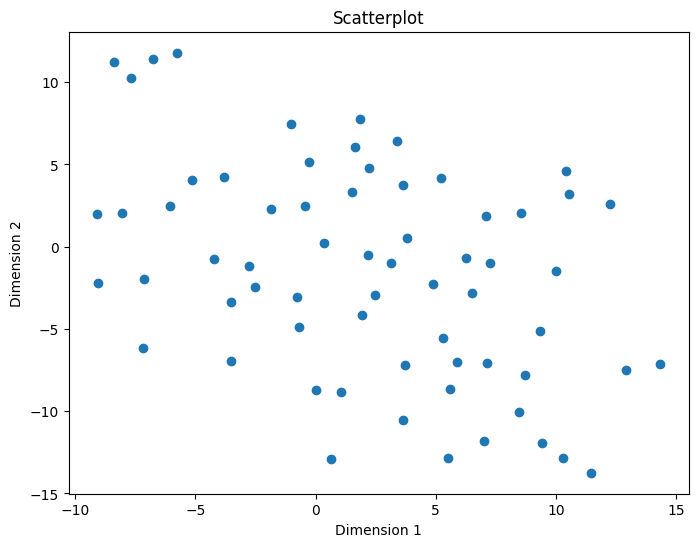

醫療
(22, 1536)
4


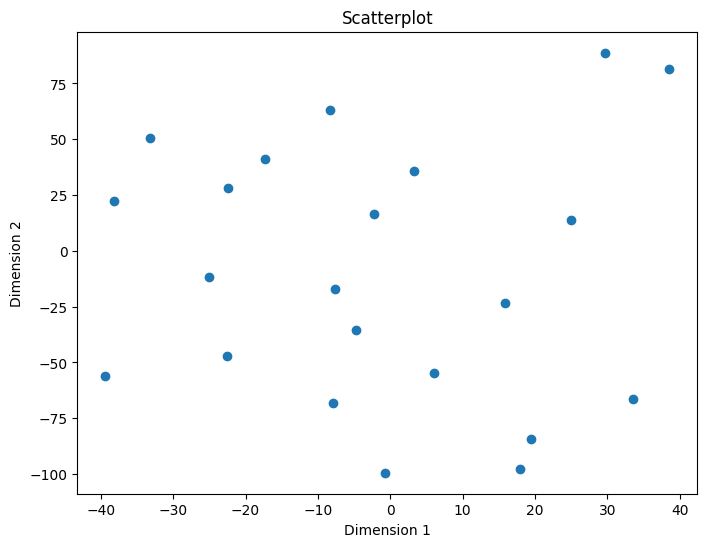

環境生態
(185, 1536)
36


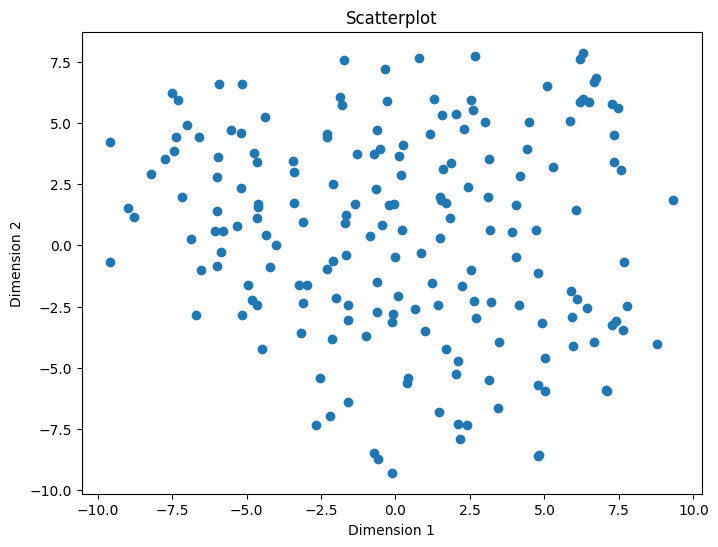

公有土地
(20, 1536)
3


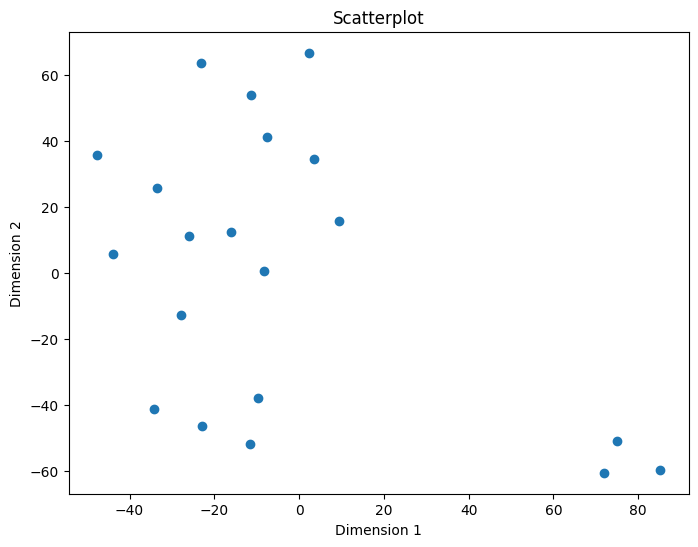

政府運作
(99, 1536)
19


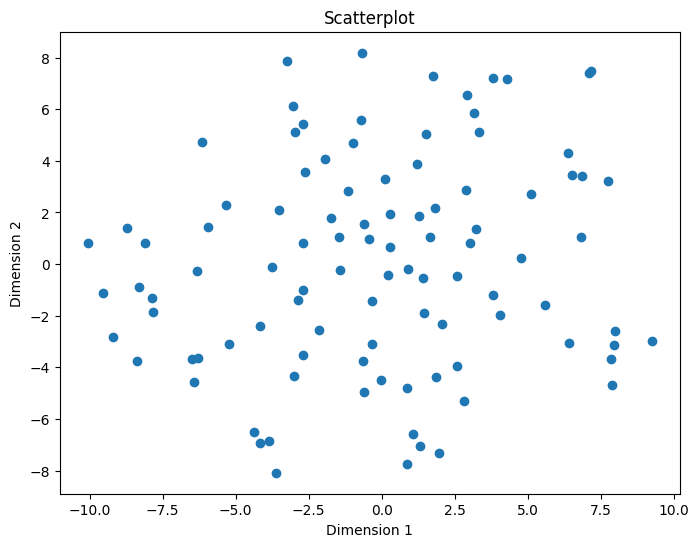

災害
(26, 1536)
5


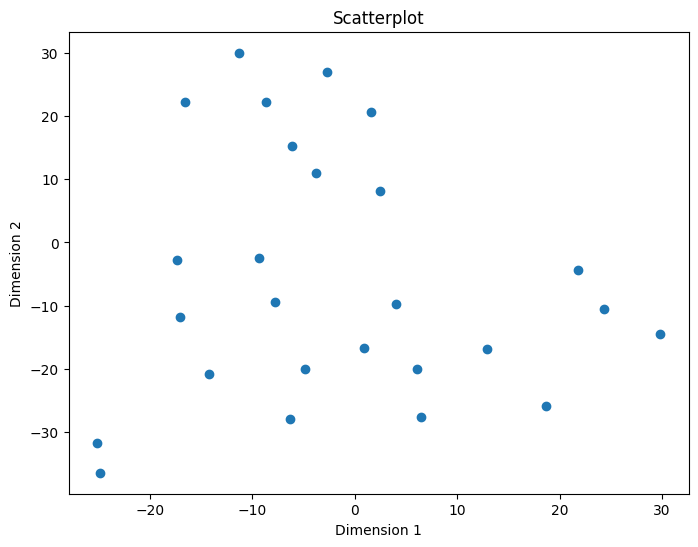

其他
(102, 1536)
20


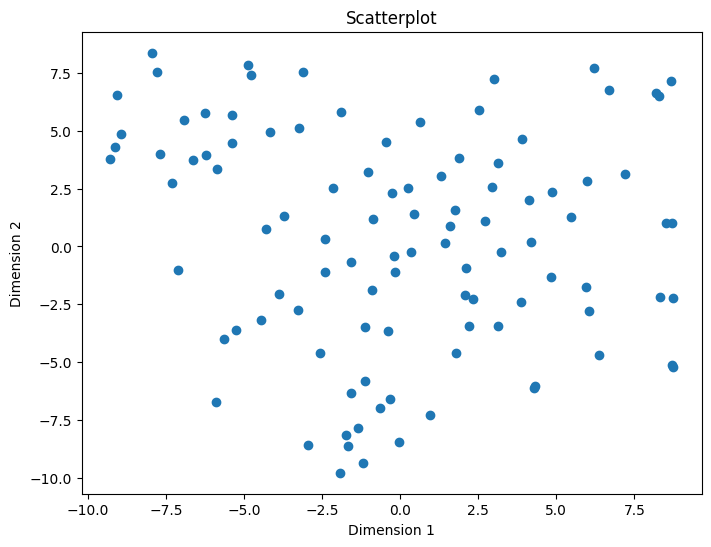

貿易
(9, 1536)
1


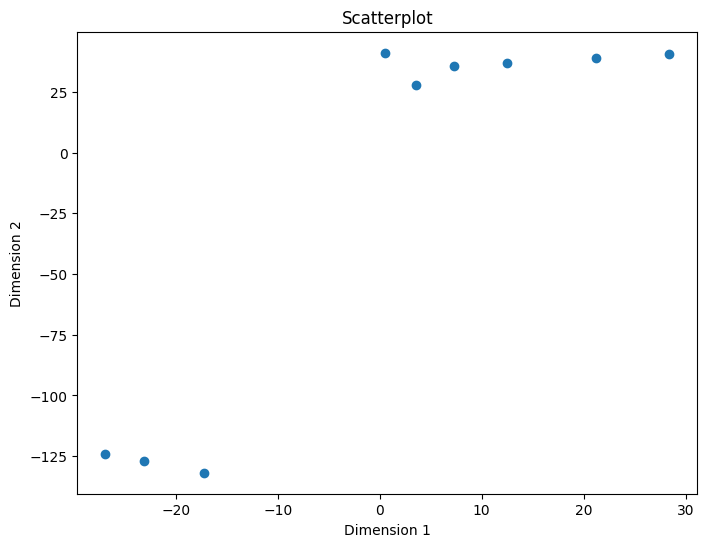

整體經濟
(11, 1536)
2


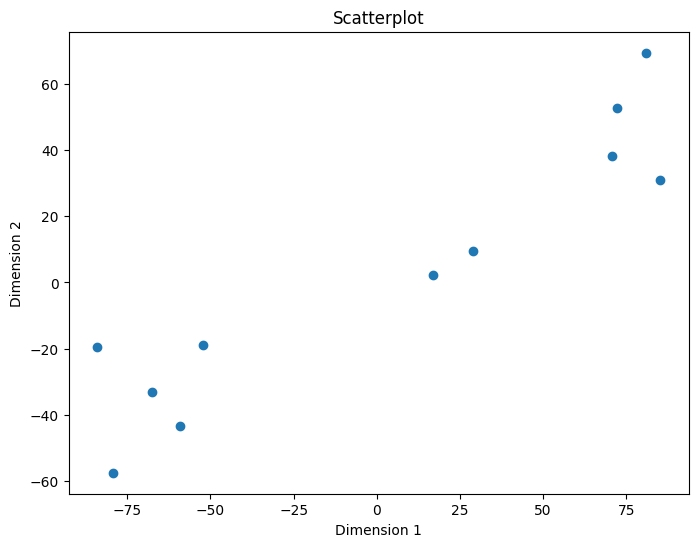

In [53]:
import json
from pprint import pprint
import numpy as np
# dataset = json.load(open('../data/result/chunk_embeddings/1129/all.json'))
# data_embeddings = [data['embedding'] for data in dataset.values()]
# data_embeddings = [embedding for embedding in data_embeddings if embedding != 'No content' ]
# data_embeddings = np.array(data_embeddings)
# data_embeddings = json.load(open('../data/result/keyword_embeddings.json'))
# data_embeddings = np.array(list(data_embeddings.values()))
dataset = json.load(open('../data/result/chunk_embeddings/1103/all_chunks.json'))
data_embeddings = {data['id']:data['embedding'] for data in dataset}
topic_chunks_dict = organize_chunk_topis()
coordinates = {}
for topic, chunk_ids in topic_chunks_dict.items():
    print(topic)
    chunk_embeddings = np.array([data_embeddings[chunk_id] for chunk_id in chunk_ids])
    print(chunk_embeddings.shape)
    XY = dr(chunk_embeddings, 'tsne')
    plot(XY)
    XY = min_max_normalize(XY)
    for chunk_id, coordinate in zip(chunk_ids, XY):
        coordinates[chunk_id] = coordinate.tolist()
save_json(coordinates, r'../data/result/chunk_coordinates.json')

In [23]:
print(dr_result)

[[ 0.70108294 -3.0576444 ]
 [ 1.3033116  -4.7527566 ]
 [ 1.8444233   2.4262116 ]
 ...
 [-1.7842017  -0.38798994]
 [ 6.345119   -6.6040273 ]
 [-5.1262107  -2.8957558 ]]


1007
[[ 0.01593417 -0.01771376  0.00587265 ...  0.00797393 -0.01856249
  -0.00994517]
 [ 0.0031295  -0.00377638  0.00904234 ...  0.00538834 -0.01667203
  -0.00659468]
 [ 0.02399973 -0.00046937 -0.00406707 ... -0.00075838 -0.00535564
  -0.03315399]
 ...
 [-0.03743799 -0.00400328 -0.00190624 ... -0.00299726 -0.01803906
  -0.00897096]
 [-0.00690714 -0.01060336  0.01082938 ...  0.00834973 -0.00065855
  -0.02336062]
 [-0.0024635  -0.02594816  0.01585416 ... -0.00506071 -0.00428926
  -0.02614017]]


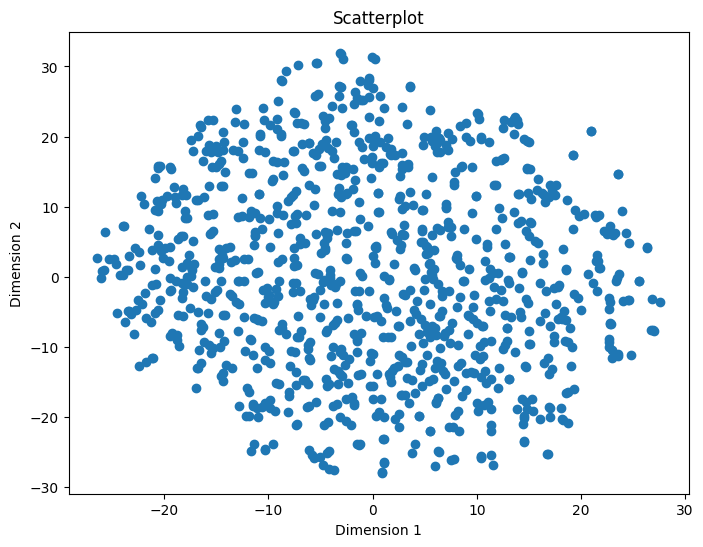

In [17]:
node_coordinates = {}
nodes = json.load(open('../data/result/keyword_embeddings.json'))
print(len(nodes))
embeddings = np.array(list(nodes.values()))
print(embeddings)
node_ids = list(nodes.keys())
XY = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=70, metric='cosine').fit_transform(embeddings)
# XY = MDS(n_components=2).fit_transform(embeddings)
# XY = reducer.fit_transform(embeddings)
plot(XY)
XY = min_max_normalize(XY)
for node_id, coordinate in zip(node_ids, XY):
    node_coordinates[node_id] = coordinate.tolist()
save_json(node_coordinates, r'../data/result/keyword_coordinates.json')

In [ ]:
from collections import defaultdict
import json
dataset = json.load(open('../data/result/chunk_embeddings/1029/all_messages.json'))
chunk_messages = defaultdict(list)
for message in dataset:
    chunk_id = message['interview_id'] + "_" + str(message['chunk_index'])
    chunk_messages[chunk_id].append(message)

In [ ]:
from pprint import pprint
import itertools
from numpy.linalg import norm
import numpy as np
import json

def similarity(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.dot(v1,v2)/(norm(v1)*norm(v2))
all_chunks = json.load(open('../data/result/chunk_embeddings/1103/all_chunks.json'))
chunk_similarities = []
for c1, c2 in itertools.combinations(all_chunks, 2):
    # c1_embeddings = [message['embedding'] for message in chunk_messages[c1]]
    # c2_embeddings = [message['embedding'] for message in chunk_messages[c2]]
    # pairwise_similarities = [similarity(m1, m2) for m1 in c1_embeddings for m2 in c2_embeddings]
    # cluster_similarity = max(pairwise_similarities)
    c1_embedding = c1['embedding']
    c2_embedding = c2['embedding']
    cluster_similarity = similarity(c1_embedding, c2_embedding)
    c1_id = c1['id']
    c2_id = c2['id']
    chunk_similarities.append((c1_id, c2_id, cluster_similarity))
save_json(chunk_similarities, '../data/result/chunk_embeddings/1103/chunk_similarities.json')
